## Topic 4 - Outliers

#### Exercise 1

Create box plots on a single set of axes for all five experiments in the morley data set.

In [72]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

In [73]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:]

In [74]:
# first experiment.
exper_1 = data[:20, 2]

exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [75]:
# Second experiment.
exper_2 = data[20:40, 2]

exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

In [76]:
# A quick way to get the five experiments in different columns.
Fiveexperiments = data[:,2].reshape(5, 20).T
Fiveexperiments

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

In [77]:
# third experiment
exper_3 = Fiveexperiments[:20, 2]
exper_3

array([880., 880., 880., 860., 720., 720., 620., 860., 970., 950., 880.,
       910., 850., 870., 840., 840., 850., 840., 840., 840.])

In [78]:
# fourth experiment
exper_4 = Fiveexperiments[:20, 3]
exper_4

array([890., 810., 810., 820., 800., 770., 760., 740., 750., 760., 910.,
       920., 890., 860., 880., 720., 840., 850., 850., 780.])

In [79]:
# Fifth Experiment
exper_5 = Fiveexperiments[:20, 4]
exper_5

array([890., 840., 780., 810., 760., 810., 790., 810., 820., 850., 870.,
       870., 810., 740., 810., 940., 950., 800., 810., 870.])

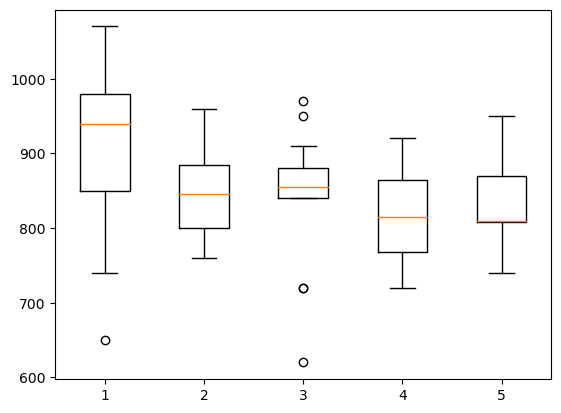

In [80]:
plt.boxplot(np.array([exper_1, exper_2, exper_3, exper_4, exper_5]).T);